# <font color="green"> 1. Introduction</font>

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:
    1. Define the question, the metric for success, the context, experimental design taken and the                    appropriateness of the available data to answer the given question
    2. Find and deal with outliers, anomalies, and missing data within the dataset.
    3. Perform univariate, bivariate and multivariate analysis recording your observations.
    4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component          analysis, and discriminant analysis.
    5. Challenge your solution by providing insights on how you can make improvements.

#### <font color='blue'> 1.1 Research Question </font>

What factors (e.g. cell phone access, location, age, gender, job type, education level, relationship with head of household, marital status) influence whether or not an individual has or uses a bank account?

#### <font color='blue'> 1.2 Metric for Success </font>

The analysis and conclusion will be successfully conducted when we are able to find out the factors that influence whether or not one has or uses a bank account, and provide suggestions on how to increase financial inclusion.

#### <font color='blue'> 1.3 Context </font>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

#### <font color='blue'> 1.4 Experimental Design </font>

#### <font color='blue'> 1.5 Appropriateness of Data </font>

# <font color='green'> 2. Data Preparation </font>

#### <font color='blue'> 2.1 Load Python libraries and the dataset </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#provide the variable definitions
varDef = pd.read_csv('VariableDefinitions (1).csv')
varDef

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
financial = pd.read_csv('Financial Dataset - 1 (2).csv')
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#### <font color='blue'> 2.2 Preview the dataset and gather basic info about it </font>

In [4]:
# provide summary statistics
financial.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1046,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
# check that the columns have their corresponding data types
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [6]:
# check the shape of the dataset
financial.shape

## 23,524 rows/records and 13 columns

(23524, 13)

In [7]:
# count the number of non-missing values in each column
financial.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

# <font color='green'> 3. Data Cleaning </font>

#### <font color='blue'> 3.1 Columns </font>

In [8]:
# rename columns to improve consistency
financial = financial.rename(columns = {
    'uniqueid' : 'unique_id',
    'Has a Bank account' : 'bank_account',
    'Type of Location' : 'location_type',
    'Cell Phone Access' : 'cell_phone_access',
    'Respondent Age' : 'respondent_age',
    'gender_of_respondent' : 'respondent_gender',
    'The relathip with head' : 'rship_w_head',
    'Level of Educuation' : 'education_level',
    'Type of Job' : 'job_type'
})

financial.columns

Index(['country', 'year', 'unique_id', 'bank_account', 'location_type',
       'cell_phone_access', 'household_size', 'respondent_age',
       'respondent_gender', 'rship_w_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [9]:
# save this dataset so as to use it as a checkpoint in case of irreversible errors
financial.to_csv('financial_dataset.csv', index=False)

In [10]:
# uncomment the below code to reload dataset to last saved checkpoint when needed

#financial = pd.read_csv('financial_dataset.csv')
#financial.head()

#### <font color='blue'> 3.2 Duplicates </font>

In [11]:
# check for and display duplicates
duplicatedData = financial[financial.duplicated()]
duplicatedData

## no duplicated data found

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type


#### <font color='blue'> 3.3 Null values </font>

In [12]:
# total number of missing values
np.count_nonzero(financial.isna())

## we have 267 missing values

267

In [13]:
# look for where exactly the missing values are
financial.isna().sum()

country              14
year                  0
unique_id             0
bank_account         36
location_type        15
cell_phone_access    11
household_size       28
respondent_age       34
respondent_gender    34
rship_w_head          4
marital_status       32
education_level      29
job_type             30
dtype: int64

##### 3.3.1 Handling null values in 'country' column

In [14]:
# investigate the missing values in the 'country' column
countries = financial.loc[financial['country'].isna() == True]

# get the number of missing values 
print(countries.shape[0], "missing values")

# preview the dataset
countries

## we see that the missing 'country' values seem to be in index range 18200 to 18316
## since the entire dataset seems to be arranged first by index number then by country, we can assume
## that these missing values all are the country.

## so, we get the country before and after this dataset

14 missing values


,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
18201,NaN,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female,Head of Household,Widowed,Primary education,Self employed
18202,NaN,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female,Spouse,Single/Never Married,Primary education,No Income
18203,NaN,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female,Head of Household,Widowed,No formal education,Self employed
18204,NaN,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female,Head of Household,Widowed,No formal education,Self employed
18205,NaN,2017,uniqueid_3403,No,Rural,No,3.0,18.0,Male,Child,Divorced/Seperated,Secondary education,Remittance Dependent
18206,NaN,2017,uniqueid_3404,No,Urban,Yes,2.0,73.0,Female,Head of Household,Married/Living together,No formal education,Self employed
18207,NaN,2017,uniqueid_3405,No,Urban,No,1.0,40.0,Male,Head of Household,Widowed,No formal education,Self employed
18208,NaN,2017,uniqueid_3406,No,Urban,No,3.0,28.0,Male,Parent,Married/Living together,No formal education,Self employed
18312,NaN,2017,uniqueid_3510,No,Urban,No,2.0,19.0,Male,Parent,Divorced/Seperated,Secondary education,No Income


In [15]:
# examine the record above the dataset
financial.loc[financial['unique_id'] == 'uniqueid_3397']
## we see that Tanzania has a unique ID of 3397 and is in index number 18199, which is directly above
## the first record of the dataset containing the missing country.

# examine the record below the dataset
financial.loc[financial['unique_id'] == 'uniqueid_3515']
## we see that Tanzania has a unique ID of 3515 and is in index number 18317, which is directly below
## the last record of the dataset containing the missing country.


,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type
3514,Kenya,2018,uniqueid_3515,No,Urban,No,3.0,17.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
9582,Rwanda,2016,uniqueid_3515,No,Rural,Yes,1.0,68.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing
18317,Tanzania,2017,uniqueid_3515,No,Urban,Yes,2.0,27.0,Female,Child,Divorced/Seperated,No formal education,Informally employed


In [16]:
## therefore, to deal with these null values, it would make sense to replace them with "Tanzania".
## for this, we will use the "fill forward" method

financial.country.fillna(method='ffill', inplace=True)

## hence, we have taken care of the missing values in the 'country' column

# confirm that the 'country' column does not have any missing values
np.count_nonzero(financial.country.isna())

## there are no more null values in the 'country' column

0

##### 3.3.2 Dropping the rest of the null values since they depend on too many variables to be simply imputed

In [17]:
financial.dropna(inplace=True)

# now checking the shape of our new dataset
financial.shape

## we are down to 23,321records

(23357, 13)

#### <font color='blue'> 3.4 Other anomalies in the data </font>

In [18]:
# remove all records that have education level as '6' since this does not make
# any logical sense and imputing will prove to be tricky
edu6 = financial.loc[financial['education_level'] == '6'].index
financial = financial.drop(edu6)

# check to confirm they have been removed
financial.loc[financial['education_level'] == '6']

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type


In [19]:
# remove household sizes of 0 since they make no logical sense
house0 = financial.loc[financial['household_size'] == 0].index
financial = financial.drop(house0)

# check to confirm that they have been removed
financial.loc[financial['household_size'] == 0]

,country,year,unique_id,bank_account,location_type,cell_phone_access,household_size,respondent_age,respondent_gender,rship_w_head,marital_status,education_level,job_type


In [20]:
# finally confirm there are no missing values
financial.isna().sum()

country              0
year                 0
unique_id            0
bank_account         0
location_type        0
cell_phone_access    0
household_size       0
respondent_age       0
respondent_gender    0
rship_w_head         0
marital_status       0
education_level      0
job_type             0
dtype: int64

In [21]:
# check final shape of dataset
financial.shape

# we are now down to 23,294 records

(23294, 13)

# <font color='green'> 4. Data Analysis </font>

## <font color='blue'> 4.1 Univariate Analysis </font>

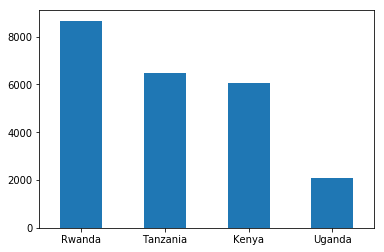

In [22]:
# distribution per country
financial.country.value_counts().plot.bar(rot=0)

## Rwanda has the most number of respondents followed by Tanzania, Kenya, and finally
## Uganda

Text(0.5, 1.0, 'Females vs Males')

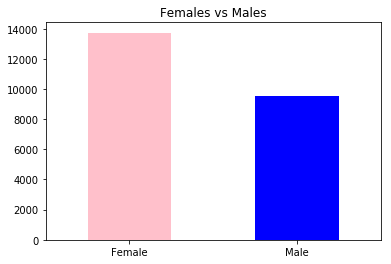

In [23]:
# compare number of male respondents to that of female respondents
financial.respondent_gender.value_counts().plot(kind='bar', rot=0, color=('pink','blue'))
plt.title("Females vs Males")

## females outnumber males

In [24]:
# number of people with bank accounts
financial['bank_account'].value_counts()

## 20,003 do not have a bank account while only 3,291 do

No     20003
Yes     3291
Name: bank_account, dtype: int64

In [25]:
# how do rural respondents compare to urban ones?
financial.location_type.value_counts()

# rural respondents outnumber urban ones 14,238 to 9,056

Rural    14238
Urban     9056
Name: location_type, dtype: int64

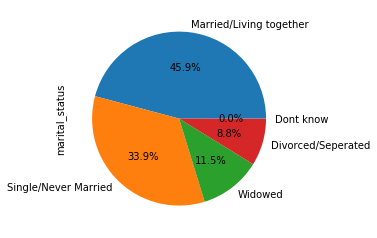

In [26]:
# show distribution by marital status
financial['marital_status'].value_counts().plot.pie(autopct='%0.1f%%')

## majority of the respondents are married/living together, followed by those who
## are single/never married. Very few don't know their marital status, which I consider unusual

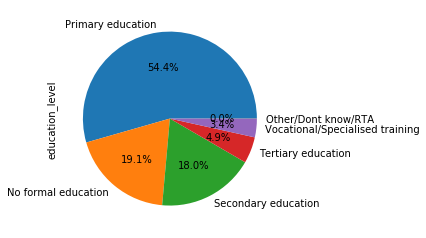

In [27]:
# show distribution by education level
financial.education_level.value_counts().plot.pie(autopct='%0.1f%%')

## more than half of the respondents have achieved at least primary level education

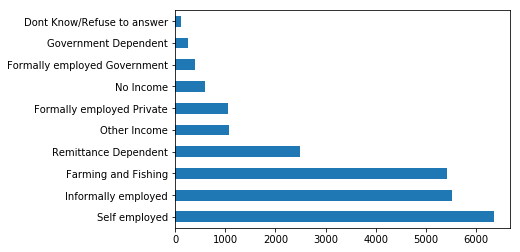

In [28]:
# frequency ditribution of job types
financial.job_type.value_counts().plot(kind='barh')

## majority of the respondents are self-employed, whereas the least frequent job type
## are those dependent on the government excluding the respondents that either
## don't know or refuse to answer

In [29]:
# mean, median, and modal age
print("Mean age is ", round(financial.respondent_age.mean(),1))
print("Median age is ", financial.respondent_age.median())
print("Modal age is ", financial.respondent_age.mode())

## Mean is 38.8, Median is 35, and Mode is 30

Mean age is  38.8
Median age is  35.0
Modal age is  0    30.0
dtype: float64


In [30]:
# mean, median, and modal household size
print("Mean household size is ", round(financial.household_size.mean(),1))
print("Median household size is ", financial.household_size.median())
print("Modal household size is ", financial.household_size.mode())

## Mean is 3.7, median is 3, mode is 2

Mean household size is  3.7
Median household size is  3.0
Modal household size is  0    2.0
dtype: float64


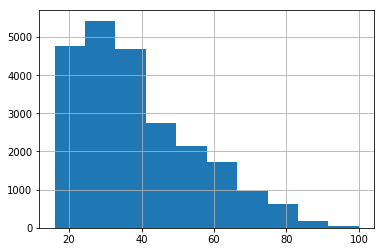

In [31]:
# distribution of age
financial.respondent_age.hist(bins=10)

## the distribution is positively skewed, i.e., most of the values fall to the left
## side of the mean. This shows that the sample contains a lot of respondents that are 
## relatively young

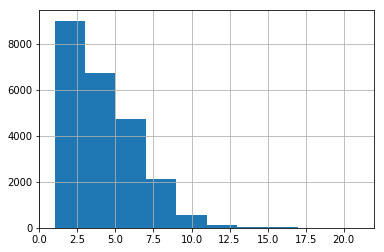

In [32]:
# distribution of household size
financial.household_size.hist(bins=10)

## the distribution is also positively skewed, showing that the sample has a preference
## for smaller household sizes

In [33]:
# standard deviations of respondent ages and household sizes
print("Standard deviation of respondent age:", financial.respondent_age.std())
print("Standard deviation of household size:", financial.household_size.std())

## the standard deviations of respondent ages and household are approximately 16.48
## and 2.28 respectively.This means that the respondent ages are farther spread apart
## from the mean while the dispersion of the household sizes is quite close to the mean

Standard deviation of respondent age: 16.47659057982765
Standard deviation of household size: 2.2777038292162373


In [34]:
# what about the kurtosis of the distributions?
print("Respondent age has a kurtosis of approximately", financial.respondent_age.kurt())
print("Household size has a kurtosis of approximately", financial.household_size.kurt())

## both have a kurtosis value lower than 3, which is the kurtosis value of a normal distribution.
## this makes both distributions platykurtic, which means that the distributions are light-tailed
## indicating the presence of little to no outliers

Respondent age has a kurtosis of approximately 0.09407961553056055
Household size has a kurtosis of approximately 1.1611027371148


## <font color='blue'> 4.2 Bivariate Analysis </font>

#### 4.2.1 Factors affecting whether one has a Bank Account

[Text(0, 0.5, 'Number of Respondents'), Text(0.5, 1.0, 'Bank Account by Year')]

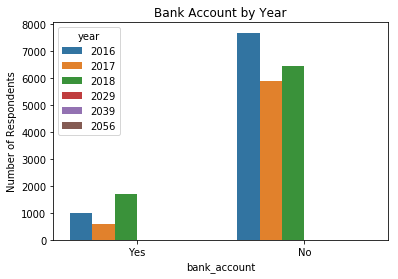

In [35]:
# bank account by year
by = sns.countplot('bank_account', hue='year', data=financial)
by.set(ylabel = 'Number of Respondents',
       title = 'Bank Account by Year')

## while there is increase in getting bank accounts over the years, the numbers are
## still drastically low. This makes it very important to look into financial inclusion

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Bank Account by Country')]

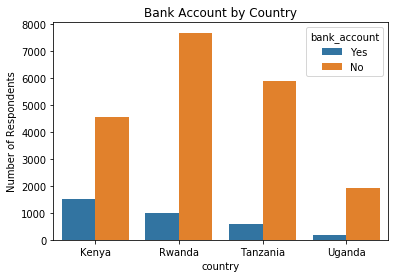

In [36]:
# bank account by country
bc = sns.countplot('country', hue='bank_account', data=financial)
bc.set(ylabel = 'Number of Respondents',
       title = 'Bank Account by Country')

## while all four East African countries have disappointingly low numbers of people with
## bank accounts, Kenya has the highest with Uganda having the lowest numbers of bank account
## holders. Rwanda, however, reports having the highest number of people without bank accounts

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Bank Account by Gender')]

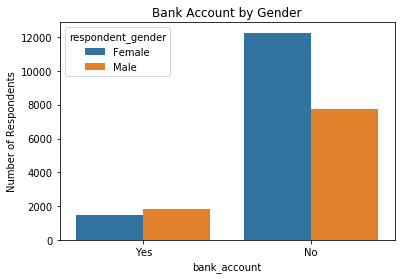

In [37]:
# male vs female have bank account
gba = sns.countplot('bank_account', hue='respondent_gender', data=financial)
gba.set(ylabel = 'Number of Respondents',
       title = 'Bank Account by Gender')

## more males than females have a bank account

[Text(0, 0.5, 'Number of Location Entries'),
 Text(0.5, 1.0, 'Bank Account by Location')]

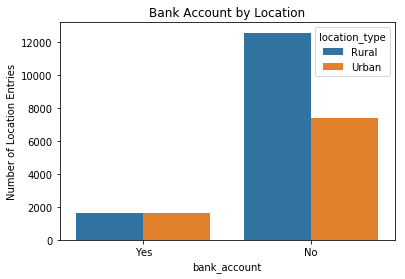

In [38]:
# rural vs urban access to a bank account
rvu = sns.countplot('bank_account', hue='location_type', data=financial)
rvu.set(ylabel = 'Number of Location Entries',
       title = 'Bank Account by Location')

## no seemingly significant difference between location and having a bank account
## however, more rural respondents than urban ones report not having a bank account

[Text(0, 0.5, 'Number of those with cell phones'),
 Text(0.5, 1.0, 'Bank Account by Cell Phone Access')]

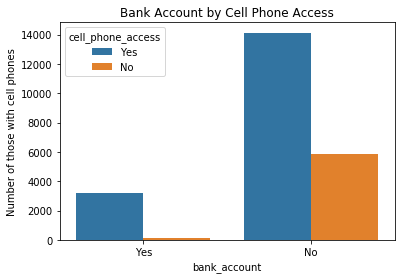

In [39]:
# bank account by cell phone access
bcpa = sns.countplot('bank_account', hue='cell_phone_access', data=financial)
bcpa.set(ylabel = 'Number of those with cell phones',
       title = 'Bank Account by Cell Phone Access')

## having cell phone access makes you more likely to have a bank account. However, far many who
## have cell phones still do not have bank accounts

Text(0.5, 1.0, 'Bank account by marital status')

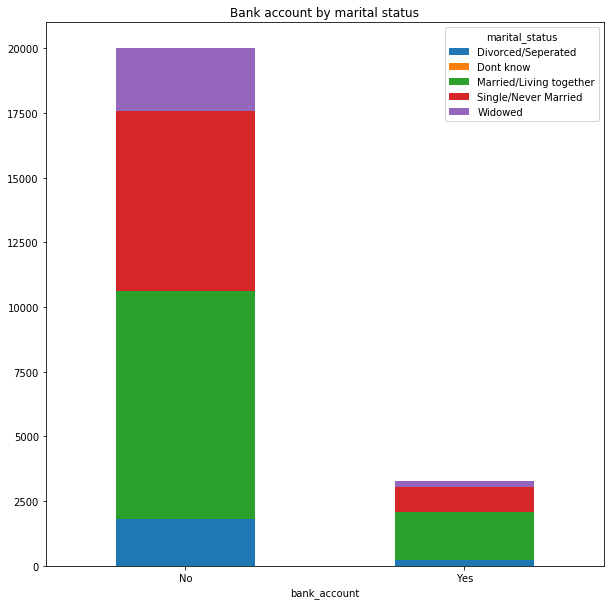

In [40]:
# bank account by marital status
bms = financial.groupby(['bank_account', 'marital_status']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Bank account by marital status')

## of those who do not have a bank account, an overwhelming majority are either married/living
## together or single/never married. Of those who do have a bank account, their marital status 
## is married/living together, while those who are widowed have the least number of bank accounts

Text(0.5, 1.0, 'Bank account by relationship with head of household')

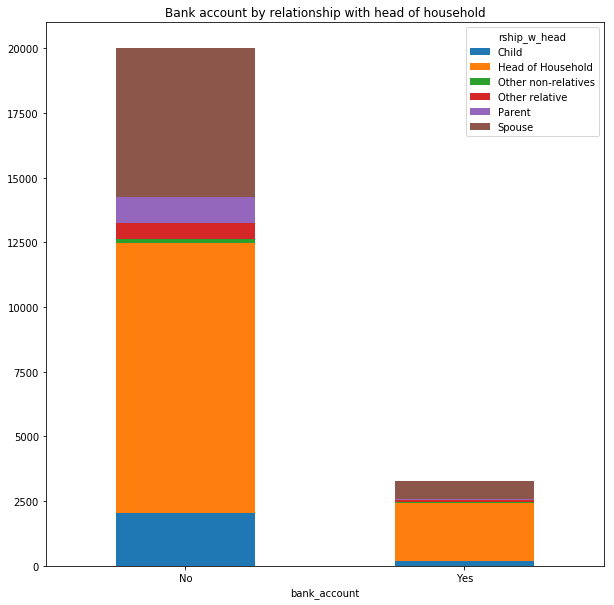

In [41]:
# bank account by relationship with head of household
brh = financial.groupby(['bank_account', 'rship_w_head']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Bank account by relationship with head of household')

## relationship with head of household does not guarantee that one will have a bank account

Text(0.5, 1.0, 'Bank account by education level')

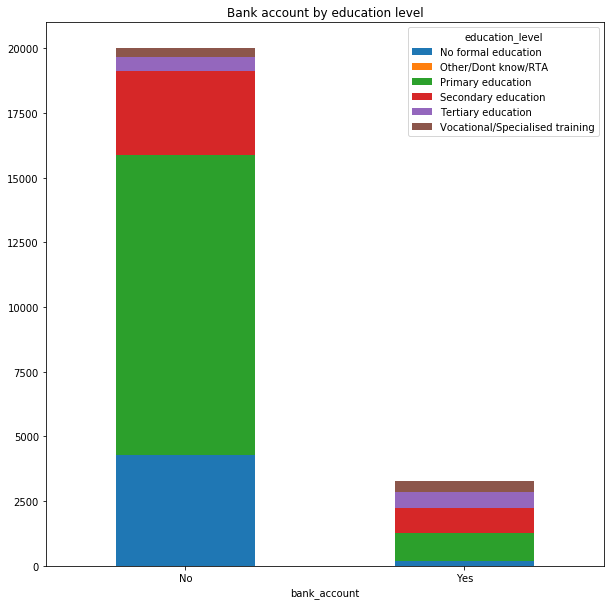

In [42]:
# bank account by education level
bel = financial.groupby(['bank_account', 'education_level']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Bank account by education level')

## education level also does not guarantee that one will have a bank account. However,
## majority of those who do not have a bank account have reached primary level 

Text(0.5, 1.0, 'Bank account by job type')

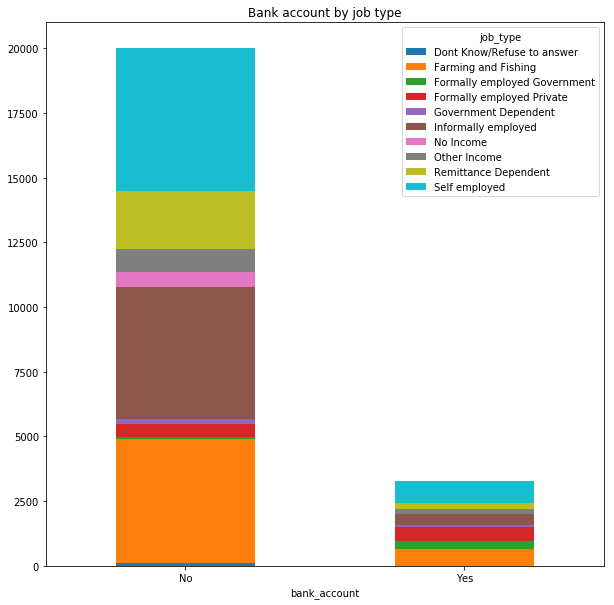

In [43]:
# bank account by job type
bjt = financial.groupby(['bank_account', 'job_type']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Bank account by job type')

## those who reported being self employed, informally employed, or working in the farming
## and fishing sector have the numbers when it comes to NOT having a bank account. However,
## of those who do actually have a bank account, self employed respondents are in the lead followed
## by those who do farming or fishing. Additionally, those who are dependent on the government
## have the least number of bank accounts

In [44]:
# does age affect whether or not you have a bank account?
from scipy import stats

yesAge = financial.bank_account == "Yes"
yesAge = financial[yesAge].respondent_age

noAge = financial.bank_account == "No"
noAge = financial[noAge].respondent_age

stats.ttest_ind(yesAge, noAge)

## p-value is less than the alpha value of 0.05, hence we conclude that, yes, having
## a bank account depends on age

Ttest_indResult(statistic=3.0789585893837375, pvalue=0.002079671128675828)

In [45]:
# does household size affect whether or not you have a bank account?
yesHH = financial.bank_account == "Yes"
yesHH = financial[yesHH].household_size

noHH = financial.bank_account == "No"
noHH = financial[noHH].household_size

stats.ttest_ind(yesHH, noHH)

## p-value is less than the alpha value of 0.05, hence we conclude that, yes, having
## a bank account depends on household size

Ttest_indResult(statistic=-3.5779544638753364, pvalue=0.0003469962876122869)

#### 4.2.1 Other Factors

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Cell Phone Access by Location')]

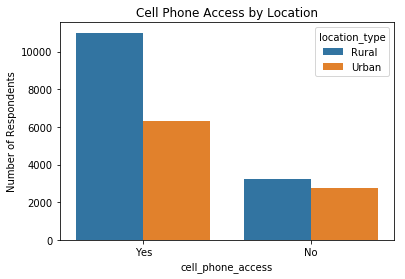

In [46]:
# cell phone access by location
cpal = sns.countplot('cell_phone_access', hue='location_type', data=financial)
cpal.set(ylabel = 'Number of Respondents',
       title = 'Cell Phone Access by Location')

## surprisingly, rural respondents have more access to cell phones than urban respondents

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Cell Phone Access by Gender')]

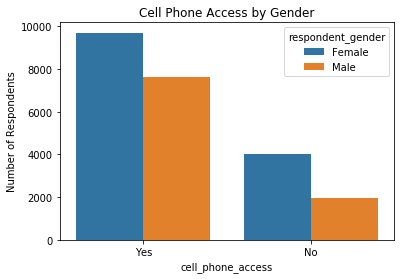

In [47]:
# male vs female access to cell phones
gcpa = sns.countplot('cell_phone_access', hue='respondent_gender', data=financial)
gcpa.set(ylabel = 'Number of Respondents',
       title = 'Cell Phone Access by Gender')

## more females than males have access to cell phones

Text(0.5, 1.0, 'Distribution of education level per gender')

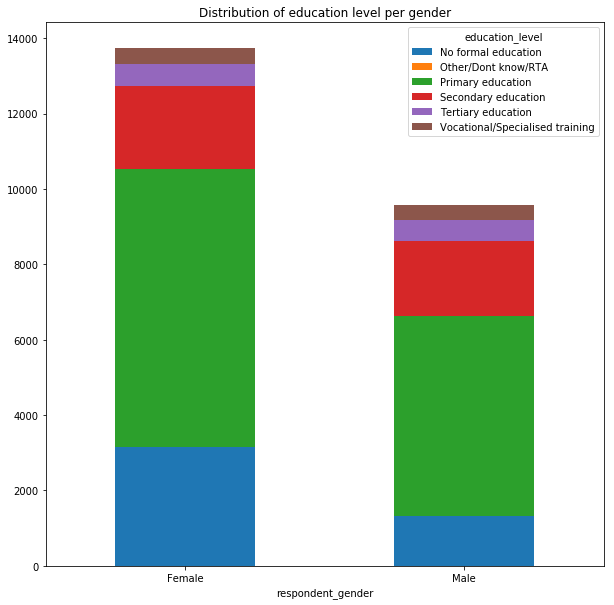

In [48]:
# gender per education level
gel = financial.groupby(['respondent_gender', 'education_level']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Distribution of education level per gender')

## more females than males have achieved primary education level. The same can be said for
## those with no formal education. In all the other education levels, there does not seem 
## to be a significant difference between the two genders

Text(0.5, 1.0, 'Relationship with Head of Household per Gender')

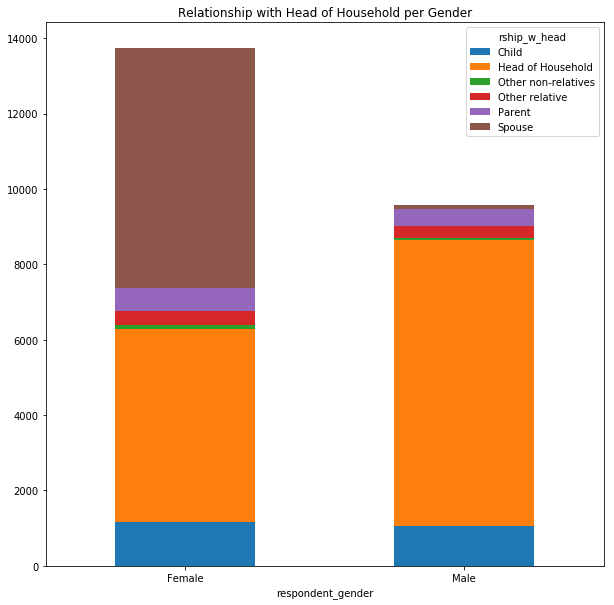

In [49]:
# gender per relationship with head of household
grh = financial.groupby(['respondent_gender', 'rship_w_head']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Relationship with Head of Household per Gender')

## females greatly outnumber males when it comes to being a spouse. Males, however, report
## more on being the Head of the household than females.

Text(0.5, 1.0, 'Job type  per gender')

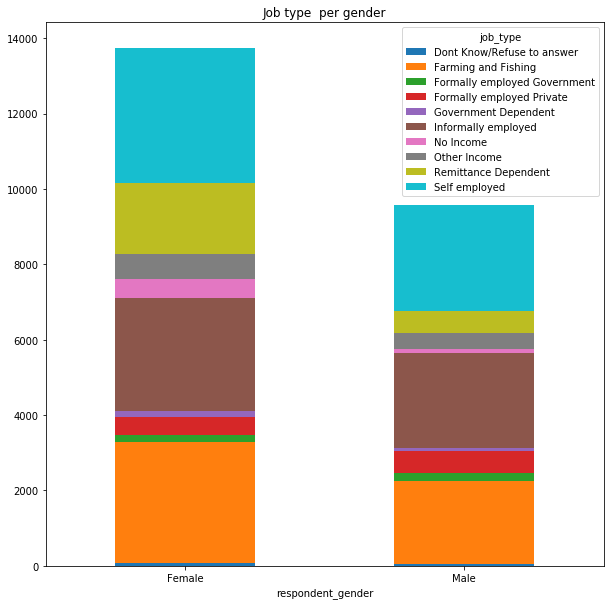

In [50]:
# job type per gender
jtg = financial.groupby(['respondent_gender', 'job_type']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([10,10]))
plt.title('Job type  per gender')

## slightly more females than males are self employed, remittance dependent, government
## dependent, informally employed, and have no income or other income. Males seem to 
## outnumber females when it comes to being formally employed, both privately and by
## the government.

Text(0.5, 1.0, 'Job Type by Education Level')

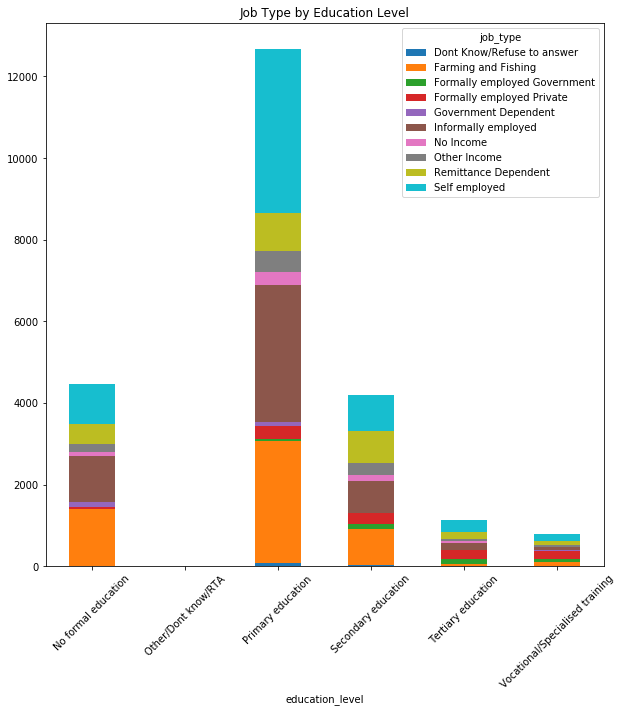

In [51]:
# job type by education
jte = financial.groupby(['education_level', 'job_type']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=45,
                                                                                       figsize=([10,10]))
plt.title('Job Type by Education Level')

## those with primary level have the highest number of jobs and majority are self employed
## informally employed, and working in the Farming or Fishing sector. Tertiary education does
## not seem to guarantee more jobs

,year,household_size,respondent_age
year,1.000000,-0.048981,-0.018250
household_size,-0.048981,1.000000,-0.117188
respondent_age,-0.018250,-0.117188,1.000000


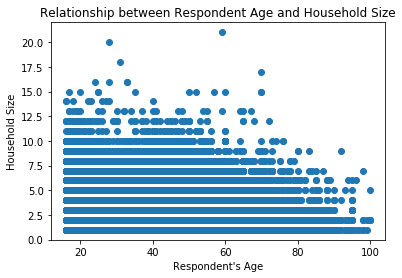

In [52]:
# what is the correlation between the numerical values in the dataset?
plt.scatter(financial['respondent_age'], financial['household_size'])
plt.xlabel("Respondent's Age")
plt.ylabel("Household Size")
plt.title("Relationship between Respondent Age and Household Size")

financial.corr()

## there is weak negative correlation (-0.117) between household size and respondent age
## i.e., as respondent age increases, household size decreases

## <font color='blue'> 4.3 Multivariate Analysis </font>

# <font color='green'> 5. Conclusion and Next Steps </font>

#### Conclusion

In conclusion, we see that, despite the number of bank accounts increasing slightly over the years, truly, financial inclusion is still very low across these four East African countries.

In my view, the dataset is very biased because most of the respondents are females, around 30 years of age, and/or living in rural areas. This makes it difficult to correctly and confidently determine whether it is those factors that affect whether an individual has a bank account or not.

Working with this dataset has provided the following results:
    * Gender: there were a lot more female respondents than male respondents. However, what was surprising was that more males than females had a bank account.
    * Location: Rural respondents greatly outnumbered urban ones but there was no significant difference between the two when it came to having a bank account. 
    * Cell phone access: more respondents had access to cell phones, and yet it was not a guarantee that one would have a bank account.
    * Household size: majority reported having a household size of 2 or less.
    * Age: majority are of ages 30 and below.
    * Relationship with head of household: most are Head of Household and, yet, most don't have bank accounts.
    * Marital status: most are married/living together, and many do have a bank account but not enough to outnumber those who do not have one.
    * Level of education: most have attained primary level of education. However, there is no significant difference between education level and having a bank account.
    * Job type: most are either self employed, informally employed, or working in the Farming and Fishing sector. Many of them have bank accounts, but not enough to outnumber those who do not have.

#### Next steps

While all variables need to be worked on to improve financial inclusion, I feel like a lot more focus needs to be on respondents from Uganda and Rwanda. The number of respondents who are urban, males, and older in age also needs to be improved to create a better and less biased dataset. 